## Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Merging 12 Month Sales Data into a single csv file

In [3]:
path=r'''C:\Users\ebint\Downloads\Pandas-Data-Science-Tasks-master\
Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data'''
path=path.replace("\\","/")
files=[files  for files in os.listdir(path)]

df=pd.DataFrame()

for file in files:
    temp_df=pd.read_csv(path+"\\"+file)
    df= pd.concat([df,temp_df])
    
df.shape

(186850, 6)

In [4]:
df.sample()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
9046,149858,AAA Batteries (4-pack),1,2.99,01/25/19 13:54,"43 Elm St, Portland, OR 97035"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [6]:
# Checking for null values

In [7]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
df = df.dropna()

## Question 1: What were the best month for sales and how much did they earn that month

In [9]:
df = df[df["Order Date"].str[0:2] !="Or"] # removing incorrect months

In [10]:
# Augmenting the data by creating new columns 

df["Month"]=df["Order Date"].str[0:2].astype("int16")
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4


In [11]:
df["Quantity Ordered"] =df["Quantity Ordered"].astype("int")

In [12]:
df["Price Each"] = df["Price Each"].astype("float")

In [13]:
df["Sales"]=df["Quantity Ordered"] * df["Price Each"]

In [14]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99


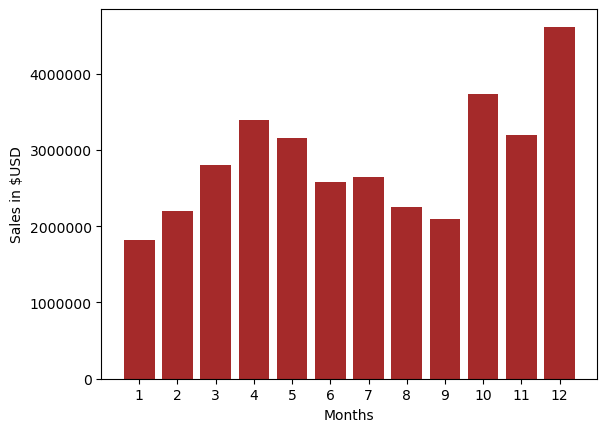

In [15]:
x = range(1,13) # Months
y = df.groupby("Month")["Sales"].sum() # Total sales / Month

plt.bar(x,y,color="brown")
plt.xticks(x)
plt.xlabel("Months")
plt.ylabel("Sales in $USD")
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

## Inferences

In [16]:
# 1) Based on the graph, we can observe that the fourth quarter, which corresponds to the months of October to December,
#    exhibits the highest sales. This can be attributed to the Christmas season, which typically drives increased consumer 
#    spending. 

# 2) Conversely, the initial months of the year display noticeably lower sales, primarily due to the reduced financial capacity
#    of individuals.

## Question 2: What states had the highest number of sales

In [17]:
# create a new column with cities

In [18]:
def get_city(address):
    return address.split(",")[1]

df["City"] = df["Purchase Address"].apply(lambda x: get_city(x))
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston


In [19]:
city_df=df.groupby("City").sum().sort_values(["Sales"])

In [20]:
df.groupby("City").sum()["Sales"]

City
 Atlanta          2795498.58
 Austin           1819581.75
 Boston           3661642.01
 Dallas           2767975.40
 Los Angeles      5452570.80
 New York City    4664317.43
 Portland         2320490.61
 San Francisco    8262203.91
 Seattle          2747755.48
Name: Sales, dtype: float64

In [21]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

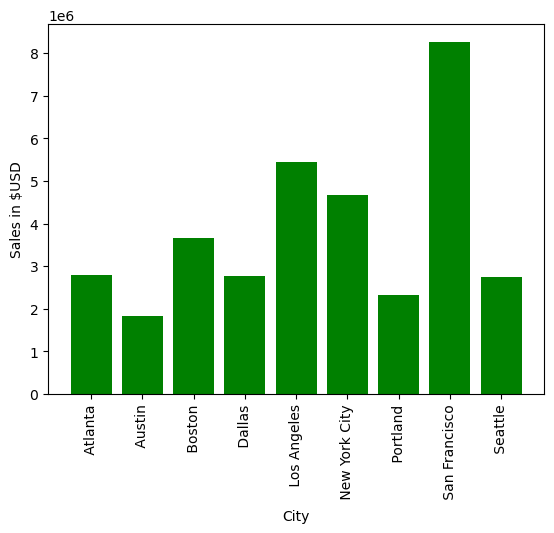

In [22]:
x = df.groupby("City").sum().index
y = df.groupby("City").sum()["Sales"] # Total sales

plt.bar(x,y,color="green")
plt.xticks(x, rotation="vertical",size=10)
#plt.ticklabel_format(axis='y', style='plain')
plt.xlabel("City")
plt.ylabel("Sales in $USD")
plt.show()

### Inference:

In [23]:
# 1) Sanfranciso, Los Angels and New York city are the top three states with highest number of sales 

# 2) Overall, analyzing sales data across cities provides valuable insights into market performance, regional trends,
#    customer preferences, and competition. By leveraging this information, businesses can make informed decisions, 
#    optimize strategies, and allocate resources effectively to drive further growth and success.

## Question 3: At what time should the company display advertisments to maximize the likelyhood of customers buying product

In [24]:
# converting order date to date time format
df["Order Date"]=pd.to_datetime(df["Order Date"])
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.950,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900,Dallas
2,176559,Bose SoundSport Headphones,1,99.990,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.990,Boston


In [25]:
df["Hour"]=df["Order Date"].dt.hour

In [26]:
df.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
9062,159154,USB-C Charging Cable,1,11.950,2019-02-08 07:49:00,"624 Ridge St, Dallas, TX 75001",2,11.950,Dallas,7
8128,184318,34in Ultrawide Monitor,1,379.990,2019-04-02 12:45:00,"517 6th St, San Francisco, CA 94016",4,379.990,San Francisco,12
10357,269248,AA Batteries (4-pack),3,3.840,2019-10-21 19:59:00,"907 9th St, Dallas, TX 75001",10,11.520,Dallas,19
984,249098,Wired Headphones,1,11.990,2019-09-22 21:31:00,"415 9th St, Seattle, WA 98101",9,11.990,Seattle,21
14038,292215,USB-C Charging Cable,1,11.950,2019-11-10 18:40:00,"193 Elm St, San Francisco, CA 94016",11,11.950,San Francisco,18


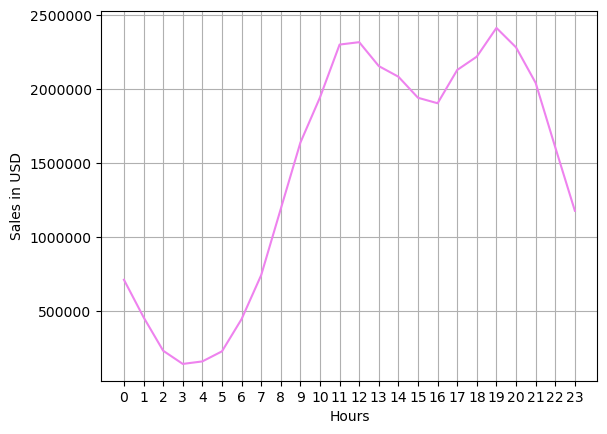

In [27]:
x=df.groupby("Hour").sum().index
y=df.groupby("Hour").sum()["Sales"]

plt.plot(x,y,color="violet")
plt.xticks(x,size=10)
plt.ticklabel_format(axis='y', style='plain')
plt.xlabel("Hours")
plt.ylabel("Sales in USD")
plt.grid()
plt.show()

### Inference:

In [28]:
# 1) The higher sales figures during the morning (6 AM to 12 PM) and evening to early night (4 PM to 8 PM) suggest that 
#    these time periods are the peak sales periods. Customers are more active during these hours and are likely to make
#    more purchases.


# 2) The sales pattern indicates that customers may prefer to shop during specific times of the day, aligning with their
#    daily routines. Mornings are typically associated with starting the day and completing tasks, while evenings are often
#    associated with leisure time and winding down. Understanding these patterns can help businesses allocate resources and
#    tailor marketing efforts to target customers during these peak periods.

## Question 4: What are the frequently purchased products

In [29]:
df["Product"].value_counts().head(5)

USB-C Charging Cable        21903
Lightning Charging Cable    21658
AAA Batteries (4-pack)      20641
AA Batteries (4-pack)       20577
Wired Headphones            18882
Name: Product, dtype: int64

### Inference:

In [30]:
# Products that have a short lifespan or products that wear out quickly tend to be sold more frequently. 
# A prime example of such products is batteries.

## Question 5: What products generates most revenue

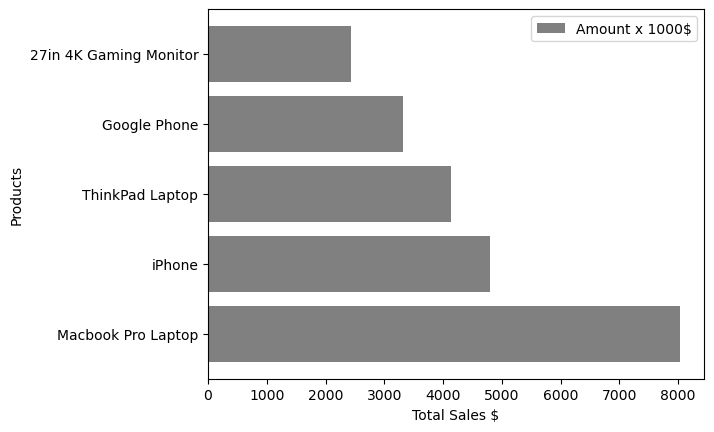

In [31]:
x = df.groupby("Product").sum().sort_values("Sales", ascending=False).head().index
y = df.groupby("Product").sum().sort_values("Sales", ascending=False).head()["Sales"]/1000

plt.barh(x,y,color="grey",label="Amount x 1000$")
plt.legend() 
plt.ylabel("Products")
plt.xlabel("Total Sales $")
plt.ticklabel_format(axis='x', style='plain')
plt.show()

In [32]:
df.groupby("Product").sum().sort_values("Sales", ascending=False).head()["Sales"]

Product
Macbook Pro Laptop       8037600.000
iPhone                   4794300.000
ThinkPad Laptop          4129958.700
Google Phone             3319200.000
27in 4K Gaming Monitor   2435097.560
Name: Sales, dtype: float64

### Inference:

In [33]:
# 1) Products like laptops, phones, and monitors, particularly those from Apple, demonstrate higher sales revenue.

# 2) Increase the availability of these high-demand products by expanding distribution channels. Consider selling 
# through multiple platforms, both online and offline, to reach a wider customer base, 

## Question 6: What Products are most often sold together 

In [34]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.950,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.990,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.990,Boston,22
3,176560,Google Phone,1,600.000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000,Los Angeles,14
4,176560,Wired Headphones,1,11.990,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990,Los Angeles,14
5,176561,Wired Headphones,1,11.990,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.990,Los Angeles,9


In [35]:
# When you set keep=False as a parameter in the .duplicated() method in pandas, it marks all occurrences of duplicated rows as True. 
# This means that all duplicated rows are considered duplicates, and no occurrences are marked as unique.

# considering only duplicated rows by order id
new_df=df[df["Order ID"].duplicated(keep=False)]

In [36]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
3,176560,Google Phone,1,600.000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000,Los Angeles,14
4,176560,Wired Headphones,1,11.990,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990,Los Angeles,14
18,176574,Google Phone,1,600.000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.000,Los Angeles,19
19,176574,USB-C Charging Cable,1,11.950,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.950,Los Angeles,19
30,176585,Bose SoundSport Headphones,1,99.990,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.990,Boston,11


In [37]:
# group dataset by order id, then taking product column and combining multiple products to one single entity on a new column called combined product

new_df["Combined Product"] = new_df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

In [38]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Combined Product
3,176560,Google Phone,1,600.000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.990,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.000,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.950,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.950,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.990,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.990,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [39]:
# removing rows with duplicated order id

new_df=new_df[["Order ID","Combined Product"]].drop_duplicates()

In [40]:
new_df["Combined Product"].value_counts()[:5]

iPhone,Lightning Charging Cable         882
Google Phone,USB-C Charging Cable       856
iPhone,Wired Headphones                 361
Vareebadd Phone,USB-C Charging Cable    312
Google Phone,Wired Headphones           303
Name: Combined Product, dtype: int64

### Inference:

In [41]:
# 1) These product combinations indicate a strong trend of customers buying smartphones along with compatible charging cables 
#    and headphones.
   
# 2) Leveraging this factor business can run targeted promotions or discounts on the popular product combinations.
# This can      include limited-time offers, buy-one-get-one deals, or discounted prices when customers purchase specific combinations. 

## Question 7:  What are the top-selling products

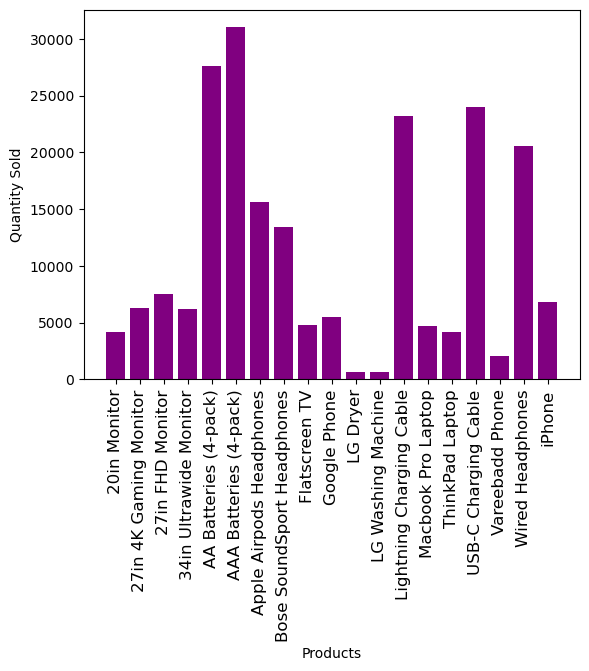

In [42]:
x = [product for product, df in df.groupby("Product")]
y = df.groupby("Product")["Quantity Ordered"].sum()

plt.bar(x,y,color="purple")
plt.ylabel("Quantity Sold")
plt.xlabel("Products")
plt.xticks(x, rotation="vertical",size=12)
plt.ticklabel_format(axis='y', style='plain')
plt.show()

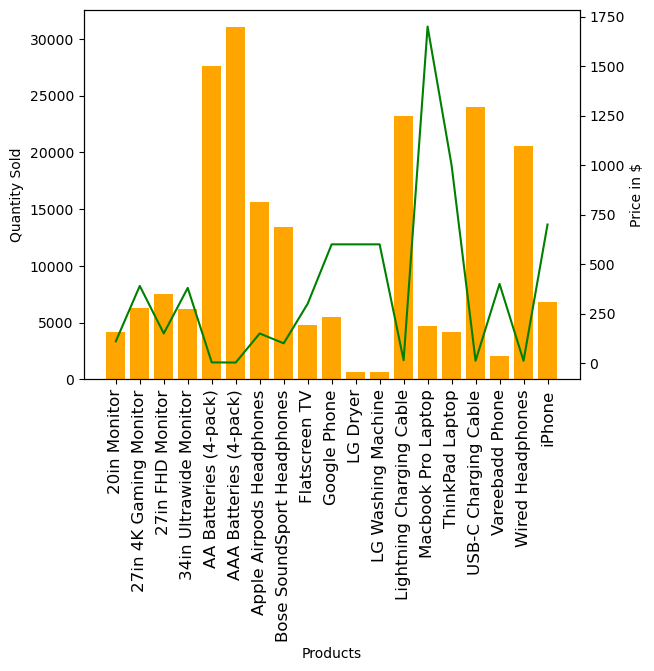

In [43]:
# comparing products sold with their prices

x = [product for product, df in df.groupby("Product")]
y = df.groupby("Product")["Quantity Ordered"].sum()
z = df.groupby("Product")["Price Each"].mean()

fig, ax1 = plt.subplots()
ax1.bar(x, y,color="orange")
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Sold')
plt.xticks(x, rotation="vertical",size=12)

# Create the second plot with y2
ax2 = ax1.twinx()
ax2.plot(x, z,color="green")
ax2.set_ylabel("Price in $")

plt.show()

### Inference:

In [44]:
# 1) Products that have lower prices, such as charging cables, tend to experience higher sales.

# 2) Despite their high prices, laptops, phones, and other commonly used devices tend
#    to have better sales due to their widespread usage
   
# 3) Products that have a short lifespan or products that wear out quickly tend to be sold more frequently. 
#    A prime example of such products is batteries. 
    
# 4) Advertising can be minimized to products that already possess a positive perception among customers
#    example Apple products